In [46]:
import pandas as pd

df = pd.read_csv('archive\SPAM text message 20170820 - Data.csv')

In [47]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [48]:
df = df[['Category','Message']]

In [49]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [51]:
df.shape

(5572, 2)

In [52]:
size = df.shape[0]
size

5572

Clean indexing: If the original CSV file had non-sequential or missing row numbers, this ensures a clean, continuous index

In [53]:
df.index = range(size)

calculating totalword count

In [54]:
total_word_count = df['Message'].apply(lambda x : len(x.split(' '))).sum()
total_word_count

np.int64(87265)

In [55]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

In [57]:
df['Category_encoded'].value_counts()


Category_encoded
0    4825
1     747
Name: count, dtype: int64

cleaning the text

In [58]:
import re
def cleantext(text):
    text = re.sub(r"http\S+",r'<URL>',text )
    text = text.lower()
    
    return text

df['Message'] = df['Message'].apply(cleantext)

In [59]:
df['Message'].head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: Message, dtype: object

lets tokenize

In [60]:
df = df.drop(columns=['Category'])

In [61]:
df.head()

,Message,Category_encoded
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0


In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer
import math
max_vocab_size = math.floor(total_word_count*0.15)

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<oov>" , filters='!@#$%^&*()_+{;}|:"<>?', lower=True)

tokenizer.fit_on_texts(df['Message'])


In [63]:
sequences = tokenizer.texts_to_sequences(df['Message'])


In [64]:
sequences

[[49,
  418,
  5160,
  5161,
  5162,
  663,
  65,
  10,
  1716,
  88,
  130,
  355,
  3322,
  154,
  5163,
  1489,
  85,
  56,
  5164,
  854],
 [72, 583, 1717, 419, 7, 3323],
 [53,
  431,
  10,
  22,
  5,
  737,
  998,
  3,
  166,
  2044,
  1071,
  584,
  2045,
  2498,
  257,
  2499,
  69,
  2044,
  3,
  2046,
  3,
  304,
  431,
  622,
  916,
  76,
  518,
  195,
  623,
  585,
  3324],
 [7, 225, 150, 23, 432, 3325, 7, 134, 196, 63, 2500],
 [1323, 2, 90, 100, 68, 433, 3, 3326, 68, 3327, 203, 135, 624],
 [738,
  136,
  85,
  1718,
  131,
  96,
  184,
  3328,
  37,
  8,
  43,
  320,
  97,
  855,
  55,
  105,
  449,
  4,
  47,
  12,
  19,
  84,
  2501,
  72,
  381,
  916,
  5165,
  3,
  3329,
  561,
  3,
  3330],
 [190, 11, 739, 9, 25, 55, 3, 349, 33, 127, 103, 797, 14, 55, 5166, 5167],
 [70,
  219,
  13,
  1324,
  2502,
  2503,
  2047,
  2504,
  2505,
  2506,
  740,
  108,
  96,
  536,
  70,
  13,
  999,
  12,
  51,
  1719,
  798,
  519,
  3,
  1072,
  13,
  295,
  999],
 [664,
  70,
  5,


In [65]:
tokenizer.word_index

{'<oov>': 1,
 'i': 2,
 'to': 3,
 'you': 4,
 'a': 5,
 'the': 6,
 'u': 7,
 'and': 8,
 'is': 9,
 'in': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'me': 14,
 'of': 15,
 'have': 16,
 'call': 17,
 'on': 18,
 'it': 19,
 'are': 20,
 'that': 21,
 '2': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'at': 27,
 'ur': 28,
 'can': 29,
 'if': 30,
 "i'm": 31,
 'get': 32,
 'with': 33,
 'be': 34,
 'will': 35,
 'do': 36,
 'now': 37,
 'just': 38,
 'we': 39,
 'this': 40,
 'gt': 41,
 'lt': 42,
 'no': 43,
 'when': 44,
 '4': 45,
 'from': 46,
 'up': 47,
 '.': 48,
 'go': 49,
 'how': 50,
 'all': 51,
 'what': 52,
 'free': 53,
 'know': 54,
 'like': 55,
 'got': 56,
 'out': 57,
 '-': 58,
 'was': 59,
 'come': 60,
 'am': 61,
 'its': 62,
 'then': 63,
 'good': 64,
 'only': 65,
 'send': 66,
 'want': 67,
 'he': 68,
 'text': 69,
 'as': 70,
 'time': 71,
 'ok': 72,
 '...': 73,
 'love': 74,
 'going': 75,
 'txt': 76,
 'by': 77,
 "i'll": 78,
 'r': 79,
 'about': 80,
 'ü': 81,
 'need': 82,
 'one': 83,
 'still': 84,
 'there': 85

In [66]:
vocabulary_size = len(tokenizer.word_index) +1
vocabulary_size

12045

In [67]:
min(vocabulary_size,max_vocab_size)

12045

we need to pad the sentences to uniform length

In [68]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 100
X = pad_sequences(sequences,
                  maxlen = max_length,
                  padding = 'post',
                  truncating='post')
X


array([[   49,   418,  5160, ...,     0,     0,     0],
       [   72,   583,  1717, ...,     0,     0,     0],
       [   53,   431,    10, ...,     0,     0,     0],
       ...,
       [12040,    59,    10, ...,     0,     0,     0],
       [    6,   515,   106, ...,     0,     0,     0],
       [12044,    62,   687, ...,     0,     0,     0]],
      shape=(5572, 100), dtype=int32)

since padded sequences are in array we need to cpncvert our category_encoded into arrays

In [69]:
y = df['Category_encoded'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [70]:
print("Input shape ",{X.shape})
print("Target Shape ",{y.shape})

Input shape  {(5572, 100)}
Target Shape  {(5572,)}


In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)


In [72]:
# Print split info
print(f"X_train shape : {X_train.shape}")
print(f" Y_train shape : {y_train.shape}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Training spam ratio: {y_train.mean():.3f}")
print(f"Testing spam ratio: {y_test.mean():.3f}")

X_train shape : (4457, 100)
 Y_train shape : (4457,)
Training samples: 4457
Testing samples: 1115
Training spam ratio: 0.134
Testing spam ratio: 0.134


lets build a lstm model

In [73]:

#adding an embedding layer

from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, SpatialDropout1D
from tensorflow.keras.models import Sequential

embedding_dim = 128
model = Sequential()
model.add(Embedding(input_dim = min(vocabulary_size,max_vocab_size),
                    output_dim = embedding_dim,
                    input_length = max_length))


C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


we use spatialdropout1d here for 
It helps prevent overfitting in text models like LSTM.
Instead of dropping random numbers (like normal Dropout), it drops whole word vectors (entire embeddings) at once.
This means, during training, some words are completely ignored in a sentence.
It makes the model less dependent on any single word.
It is usually added right after the Embedding layer in NLP models.

In [74]:
model.add(SpatialDropout1D(0.2))

LSTM units are like memory cells in the LSTM layer.
Each unit helps the model remember important information from the text.
More units mean the model can learn more details and patterns.
But, more units also make the model bigger and slower to train.
Typical values are 32, 64, or 128 units

In [75]:
from attention import Attention
#adding first lstm unit
lstm_units = 64
model.add(LSTM(lstm_units,
               dropout = 0.2,
               recurrent_dropout=0.2,
               return_sequences=True))

#adding second lstm unit

model.add(LSTM(lstm_units//2,
               dropout = 0.2,
               recurrent_dropout = 0.2
))

SpatialDropout1D is applied right after the Embedding layer. It randomly drops entire word vectors (embeddings) to make the model less dependent on specific words.

dropout in the LSTM layer randomly drops some connections between LSTM units (neurons) during training. This helps prevent the model from relying too much on certain features.

recurrent_dropout randomly drops connections between the memory cells (the recurrent connections inside the LSTM) during training. This helps the LSTM not to overfit to patterns in the sequence over time.

nothing but a fullyconnected layer

Dense layers are layers in a neural network where every neuron is connected to every neuron in the previous layer.

They combine and process the information learned by earlier layers (like LSTM).
Dense layers help the model make the final decision or prediction

In [76]:
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [77]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [78]:
import tensorflow as tf
tf.keras.backend.clear_session()
# just to make sure that current keras/tensorflow model remove from memory and resets the model environment so you dont
# run into memory problems when creating new models

# Build the model
model.build(input_shape=(None, max_length))

# build generally allocates memory fro parameters , without build we could not able to calculate parameters nbeaciuse keras use lazy loading which is 
# they dont actually create the full network until it knows the exact input dimension to train the model

In [79]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,541,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 100, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,604,129 (6.12 MB)

 Trainable params: 1,604,129 (6.12 MB)

 Non-trainable params: 0 (0.00 B)

we use callbacks which are tools that basically helps you to monitor the model training

First call back >> Early Stopping : a callback that stops training when the model is not improving based on the metric that we need to monitor and helps you to prevent the overfitting and saves time by stopping training

In [80]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta = 0, # minimum change in the monitored quality to qualify as improvement
    patience = 10, # number of epochs with no improvements after which training will be stopped
    verbose = 1, #1 displays the message when the callback takes an action
    mode = 'auto',
    #One of {"auto", "min", "max"}.
    # In min mode, training will stop when the quantity monitored has stopped decreasing;
    # in "max" mode it will stop when the quantity monitored has stopped increasing;
    #in "auto" mode, the direction is automatically inferred from the name of the monitored quantity. Defaults to "auto".
    restore_best_weights =True
)

Second call back > > ReduceLROnPLateau : it is a callback that reduce the learning rate when a metric has stopeed improving

In [81]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2, #factor by which the learning rate will be reduced lr*factor
    patience =5, #num,ber of epochs with no improvement after which learning rate will be reduced
    verbose = 1, # for updaing the messages
    mode = 'auto',
    min_lr = 0.001 #lowerbound for learning rate
    
    
)

In [82]:
import torch
print(torch.cuda.is_available())  # True if CUDA is ready
print(torch.cuda.device_count())  # Number of GPUs
print(torch.cuda.get_device_name(0))  # GPU name (first device)
print(torch.version.cuda)

True
1
NVIDIA GeForce RTX 3050 Laptop GPU
12.1


In [83]:
import tensorflow as tf
print("is gpu available ", tf.config.list_physical_devices('GPU'))

is gpu available  []


In [84]:

print("num of gpus available ",len(tf.config.list_physical_devices('GPU')))

num of gpus available  0


In [85]:
print(tf.__version__)

2.20.0


In [86]:


callbacks = [early_stopping, reduce_lr]

# Train the model
print("\nStarting training...")
batch_size = 32
epochs = 50

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    verbose=1
)


Starting training...
Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.8593 - loss: 0.4340 - val_accuracy: 0.8664 - val_loss: 0.3936 - learning_rate: 0.0010
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.8658 - loss: 0.4150 - val_accuracy: 0.8664 - val_loss: 0.3937 - learning_rate: 0.0010
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.8658 - loss: 0.4139 - val_accuracy: 0.8664 - val_loss: 0.3933 - learning_rate: 0.0010
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.8658 - loss: 0.4108 - val_accuracy: 0.8664 - val_loss: 0.3976 - learning_rate: 0.0010
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.8658 - loss: 0.4148 - val_accuracy: 0.8664 - val_loss: 0.3933 - learning_rate: 0.0010
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.8658 - loss: 0.4101 - val_accuracy: 0.8664 - val_loss: 0.3935 - learning_rate: 0.0010
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accu

In [117]:
x_x = 

SyntaxError: invalid syntax (1895034737.py, line 1)

lets make predictiions

In [87]:
y_pred_prob = model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [88]:
y_pred_prob

array([[0.1336628 ],
       [0.13366279],
       [0.13366279],
       ...,
       [0.13366279],
       [0.13366279],
       [0.13366279]], shape=(1115, 1), dtype=float32)

In [89]:
y_pred = (y_pred_prob > 0.5).astype(int)

In [90]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], shape=(1115, 1))

In [91]:
y_pred.flatten()

array([0, 0, 0, ..., 0, 0, 0], shape=(1115,))

calculate accuracy

In [92]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test,y_pred)

print("\n Test accuracy : ", accuracy)



 Test accuracy :  0.8663677130044843


In [93]:


print("Classification report :\n")
print(classification_report(y_test,y_pred, target_names=['Ham', 'Spam']))

Classification report :

              precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       966
        Spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

By watching the clssification report we can say that model missing all spam messsages, this may be the sign of the imbalance dataset or model is not learning to detect the spam at all

BAsically when dataset is imbalanced the model naturally tend to become biased towards predicting majority class

first thing is i dont want to oversample the minority or downsample the majority to make it balanced dataset instead i will use class weight balancing, so that class weights assign higher importance to the minority class during training and loss function penalizes misclassification more strongly to that class so that we force the model to pay attention to minority class instead of ignoring it

In [94]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights= compute_class_weight(
    class_weight='balanced',
    classes= np.unique(y_train),
    y= y_train
)
class_weights


array([0.57748121, 3.72658863])

In [95]:
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: np.float64(0.577481212749417), 1: np.float64(3.7265886287625416)}

In [96]:
# lets build another lstm model

tf.keras.backend.clear_session()
# making sure that we clear any previous models in memory
model2 = Sequential()

In [97]:
#adding embedding layer

model2.add(Embedding(
    input_dim = min(vocabulary_size,max_vocab_size),
    output_dim=embedding_dim,
    input_length = max_length
))

C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [98]:
# adding spatial dropout after embedding layer to randomly drop some words to make model independent on those words

model2.add(SpatialDropout1D(0.1))

In [99]:
#adding first lstm layer

model2.add(LSTM(lstm_units,dropout=0.1, recurrent_dropout=0.1, return_sequences=True))

#adding second lstm layer

model2.add(LSTM(lstm_units//2, dropout=0.1,recurrent_dropout=0.1))


In [100]:
#adding dense layers

model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.2))

#last layer

model2.add(Dense(1, activation='sigmoid'))

#building the model

model2.build(input_shape=(None, max_length))

In [101]:
#compile the model
model2.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [102]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,541,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 100, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,605,761 (6.13 MB)

 Trainable params: 1,605,761 (6.13 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping2 = EarlyStopping(
    monitor='val_recall',
    min_delta = 0, # minimum change in the monitored quality to qualify as improvement
    patience = 15, # number of epochs with no improvements after which training will be stopped
    verbose = 1, #1 displays the message when the callback takes an action
    mode = 'max',
    #One of {"auto", "min", "max"}.
    # In min mode, training will stop when the quantity monitored has stopped decreasing;
    # in "max" mode it will stop when the quantity monitored has stopped increasing;
    #in "auto" mode, the direction is automatically inferred from the name of the monitored quantity. Defaults to "auto".
    restore_best_weights =True
)
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr2 = ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2, #factor by which the learning rate will be reduced lr*factor
    patience =15, #num,ber of epochs with no improvement after which learning rate will be reduced
    verbose = 1, # for updaing the messages
    mode = 'auto',
    min_lr = 0.00001 #lowerbound for learning rate
    
    
)
callbacks2 = [early_stopping2, reduce_lr2]

In [104]:


# Train the model
print("\nStarting training...")
batch_size = 32
epochs = 100

history2 = model2.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=callbacks2,
    class_weight=class_weight_dict,
    verbose=1
)


Starting training...
Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.3994 - loss: 0.6946 - val_accuracy: 0.1336 - val_loss: 0.7088 - learning_rate: 0.0010
Epoch 2/100
  2/140 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.2188 - loss: 0.8063  

C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.4090 - loss: 0.6937 - val_accuracy: 0.1336 - val_loss: 0.7001 - learning_rate: 0.0010
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.5129 - loss: 0.6941 - val_accuracy: 0.8655 - val_loss: 0.6888 - learning_rate: 0.0010
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.6509 - loss: 0.6939 - val_accuracy: 0.1336 - val_loss: 0.7099 - learning_rate: 0.0010
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.3812 - loss: 0.6937 - val_accuracy: 0.8664 - val_loss: 0.6898 - learning_rate: 0.0010
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.6047 - loss: 0.6936 - val_accuracy: 0.1336 - val_loss: 0.6972 - learning_rate: 0.0010
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.4348 - loss: 0.6933 - val_accuracy: 0.8664 - val_loss: 0.6908 - learning_rate: 0.0010
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.5080 - loss: 0

In [105]:
#predictions
y_pred_prob2 = model2.predict(X_test)
y_pred_prob2

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


array([[0.50002205],
       [0.50002205],
       [0.50002205],
       ...,
       [0.50002205],
       [0.50002205],
       [0.50002205]], shape=(1115, 1), dtype=float32)

In [106]:
y_pred2 = (y_pred_prob2>0.5).astype(int).flatten()
y_pred2

array([1, 1, 1, ..., 1, 1, 1], shape=(1115,))

In [107]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy2 = accuracy_score(y_test,y_pred2)

print("\n Test accuracy : ", accuracy2)


print("Classification report :\n")
print(classification_report(y_test,y_pred2, target_names=['Ham', 'Spam']))


 Test accuracy :  0.1336322869955157
Classification report :

              precision    recall  f1-score   support

         Ham       0.00      0.00      0.00       966
        Spam       0.13      1.00      0.24       149

    accuracy                           0.13      1115
   macro avg       0.07      0.50      0.12      1115
weighted avg       0.02      0.13      0.03      1115



C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

Now we can see fluctuations in accuracy amd loss during trainig, even with the clas_weight balancing also model is unable to learn both classes well this may be the reason for the unstable metrics

now we are moving to test the Oversampling which is to increase them minority clasas samples, here we are using randomoVerSampler

In [108]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)

X_resampled,y_resampled = ros.fit_resample(X,y)

X_train_resampled, X_test_resampled,y_train_resampled,y_test_resampled = train_test_split(
    X_resampled,y_resampled, test_size=0.2,random_state=42
)

# lets build another lstm model

tf.keras.backend.clear_session()
# making sure that we clear any previous models in memory
model3 = Sequential()
#adding embedding layer

model3.add(Embedding(
    input_dim = min(vocabulary_size,max_vocab_size),
    output_dim=embedding_dim,
    input_length = max_length
))
# adding spatial dropout after embedding layer to randomly drop some words to make model independent on those words

model3.add(SpatialDropout1D(0.1))

#adding first lstm layer

model3.add(LSTM(lstm_units,dropout=0.1, recurrent_dropout=0.1, return_sequences=True))

#adding second lstm layer

model3.add(LSTM(lstm_units//2, dropout=0.1,recurrent_dropout=0.1))

#adding dense layers

model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))

#last layer

model3.add(Dense(1, activation='sigmoid'))

#building the model

model3.build(input_shape=(None, max_length))

#compile the model
model3.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)
model3.summary()



# Train the model
print("\nStarting training...")
batch_size = 32
epochs = 100

history3 = model3.fit(
    X_train_resampled, y_train_resampled,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test_resampled, y_test_resampled),
    callbacks=callbacks,
   # class_weight=class_weight_dict,
    verbose=1
)




C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,541,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 100, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,605,761 (6.13 MB)

 Trainable params: 1,605,761 (6.13 MB)

 Non-trainable params: 0 (0.00 B)


Starting training...
Epoch 1/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 25s 87ms/step - accuracy: 0.5028 - loss: 0.6942 - val_accuracy: 0.4870 - val_loss: 0.6936 - learning_rate: 0.0010
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.5014 - loss: 0.6936 - val_accuracy: 0.5130 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.4898 - loss: 0.6936 - val_accuracy: 0.4870 - val_loss: 0.6936 - learning_rate: 0.0010
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.4962 - loss: 0.6936 - val_accuracy: 0.4870 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.4988 - loss: 0.6934 - val_accuracy: 0.4870 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.4876 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 19s 79m

In [109]:
count = 0
for i in y_test_resampled:
    if i == 1:
        count = count+1

count


940

In [110]:
count = 0
for i in y_test_resampled:
    if i == 0:
        count = count+1

count


990

In [111]:
#predictions
y_pred_prob3 = model3.predict(X_test_resampled)
y_pred3 = (y_pred_prob3>0.4).astype(int).flatten()
accuracy3 = accuracy_score(y_test_resampled,y_pred3)

print("\n Test accuracy : ", accuracy3)


print("Classification report :\n")
print(classification_report(y_test_resampled,y_pred3, target_names=['Ham', 'Spam']))

61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step

 Test accuracy :  0.48704663212435234
Classification report :

              precision    recall  f1-score   support

         Ham       0.00      0.00      0.00       990
        Spam       0.49      1.00      0.66       940

    accuracy                           0.49      1930
   macro avg       0.24      0.50      0.33      1930
weighted avg       0.24      0.49      0.32      1930



C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

In [112]:
y_pred_prob3

array([[0.50718176],
       [0.50718176],
       [0.50718176],
       ...,
       [0.50718176],
       [0.5071817 ],
       [0.50718176]], shape=(1930, 1), dtype=float32)

(array([0, 1]), array([3835, 3885]))
(array([0, 1]), array([990, 940]))
249.06089248704663 1180.1185988593315
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.50718176]
 [0.5071817 ]
 [0.50718176]
 [0.5071817 ]
 [0.50718176]
 [0.50718176]
 [0.5071817 ]
 [0.50718176]
 [0.50718176]
 [0.5071817 ]]


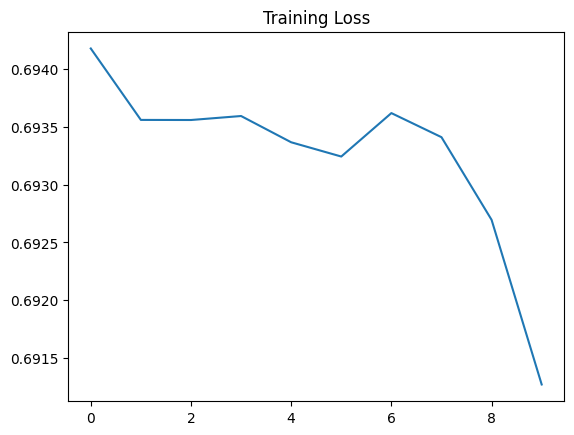

In [113]:
# Check label distribution
print(np.unique(y_train_resampled, return_counts=True))
print(np.unique(y_test_resampled, return_counts=True))

# Check input data
print(np.mean(X_train_resampled), np.std(X_train_resampled))

# Check model output on a batch
print(model3.predict(X_train_resampled[:10]))

# Check training history
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'])
plt.title('Training Loss')
plt.show()

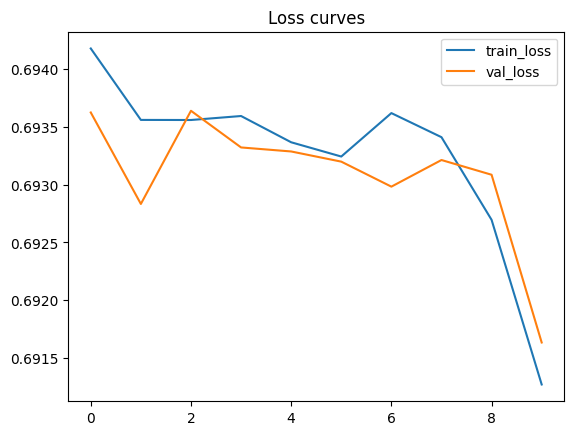

In [114]:
plt.plot(history3.history['loss'], label='train_loss')
if 'val_loss' in history3.history:
    plt.plot(history3.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss curves')
plt.show()

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

simple_model = Sequential([
    Embedding(input_dim=min(vocabulary_size, max_vocab_size), output_dim=8, input_length=max_length),
    Flatten(),
    Dense(1, activation='sigmoid')
])
simple_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_model.fit(X_train_resampled, y_train_resampled, epochs=3, batch_size=32, validation_data=(X_test_resampled, y_test_resampled))
print(simple_model.predict(X_test_resampled[:10]))

# Predict on test set
y_pred_prob_simple = simple_model.predict(X_test_resampled)
y_pred_simple = (y_pred_prob_simple > 0.5).astype(int).flatten()

# Evaluate metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nTest accuracy:", accuracy_score(y_test_resampled, y_pred_simple))
print("\nClassification report:\n", classification_report(y_test_resampled, y_pred_simple, target_names=['Ham', 'Spam']))
print("\nConfusion matrix:\n", confusion_matrix(y_test_resampled, y_pred_simple))

Epoch 1/3


C:\Users\Bachu Sai Raj\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8337 - loss: 0.4315 - val_accuracy: 0.9254 - val_loss: 0.2243
Epoch 2/3
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.1396 - val_accuracy: 0.9803 - val_loss: 0.0991
Epoch 3/3
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9859 - loss: 0.0663 - val_accuracy: 0.9860 - val_loss: 0.0582
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.036189  ]
 [0.0068556 ]
 [0.05925954]
 [0.99872404]
 [0.01755161]
 [0.9971334 ]
 [0.9975359 ]
 [0.00112507]
 [0.99936694]
 [0.0052921 ]]
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step

Test accuracy: 0.9860103626943005

Classification report:
               precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       990
        Spam       1.00      0.97      0.99       940

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930


Confusion matrix:
 [[

In [116]:
# # LSTM Network for Spam Text Classification - Line by Line Implementation
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, SpatialDropout1D
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set parameters
# max_features = 10000  # Maximum number of words to keep
# max_length = 100      # Maximum length of sequences
# embedding_dim = 128   # Embedding layer dimensions
# lstm_units = 64       # LSTM units
# test_size = 0.2       # Test split ratio
# random_state = 42     # For reproducibility

# # Print dataset info
# print("Dataset shape:", df.shape)
# print("Columns:", df.columns.tolist())
# print("Category distribution:")
# print(df['Category_encoded'].value_counts())

# # Initialize tokenizer
# tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")

# # Fit tokenizer on messages
# tokenizer.fit_on_texts(df['Message'])

# # Convert texts to sequences
# sequences = tokenizer.texts_to_sequences(df['Message'])

# # Print tokenizer info
# vocab_size = len(tokenizer.word_index) + 1
# print(f"Vocabulary size: {vocab_size}")
# print(f"Using top {min(vocab_size, max_features)} words")

# # Pad sequences to uniform length
# X = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# # Get target labels
# y = df['Category_encoded'].values

# # Print data shapes
# print(f"Input shape: {X.shape}")
# print(f"Target shape: {y.shape}")

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=test_size, random_state=random_state, stratify=y
# )

# # Print split info
# print(f"Training samples: {len(X_train)}")
# print(f"Testing samples: {len(X_test)}")
# print(f"Training spam ratio: {y_train.mean():.3f}")
# print(f"Testing spam ratio: {y_test.mean():.3f}")

# # Calculate class weights to handle imbalance
# from sklearn.utils.class_weight import compute_class_weight
# class_weights = compute_class_weight(
#     'balanced',
#     classes=np.unique(y_train),
#     y=y_train
# )
# class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
# print(f"Class weights: {class_weight_dict}")

# # Build LSTM model step by step
# print("Building LSTM model...")
# tf.keras.backend.clear_session()  # Clear any previous models

# # Initialize model
# model = Sequential()

# # Add embedding layer
# print("Adding embedding layer...")
# model.add(Embedding(input_dim=min(vocab_size, max_features), 
#                    output_dim=embedding_dim, 
#                    input_length=max_length))

# # Add spatial dropout (reduced)
# print("Adding spatial dropout...")
# model.add(SpatialDropout1D(0.1))

# # Add first LSTM layer (reduced dropout)
# print("Adding first LSTM layer...")
# model.add(LSTM(lstm_units, dropout=0.1, recurrent_dropout=0.1, return_sequences=True))

# # Add second LSTM layer (reduced dropout)
# print("Adding second LSTM layer...")
# model.add(LSTM(lstm_units//2, dropout=0.1, recurrent_dropout=0.1))

# # Add dense layers (reduced dropout)
# print("Adding dense layers...")
# model.add(Dense(64, activation='relu'))  # Increased neurons
# model.add(Dropout(0.3))  # Reduced dropout

# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))  # Reduced dropout

# # Add output layer
# print("Adding output layer...")
# model.add(Dense(1, activation='sigmoid'))

# # Build the model by calling it with sample input
# print("Building model with sample input...")
# model.build(input_shape=(None, max_length))

# # Compile model with lower learning rate
# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.0005)  # Reduced learning rate
# model.compile(
#     optimizer=optimizer,
#     loss='binary_crossentropy',
#     metrics=['accuracy', 'precision', 'recall']
# )

# # Print model summary
# print("\nModel Architecture:")
# model.summary()

# # Train the model with class weights
# print("\nStarting training...")
# batch_size = 32
# epochs = 50

# # Modified callbacks for imbalanced data
# early_stopping = EarlyStopping(
#     monitor='val_recall',  # Monitor recall instead of loss
#     patience=15,  # Increased patience
#     restore_best_weights=True,
#     verbose=1,
#     mode='max'  # Maximize recall
# )

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.3,  # More aggressive reduction
#     patience=8,  # Reduced patience
#     min_lr=0.00001,
#     verbose=1
# )

# callbacks = [early_stopping, reduce_lr]

# history = model.fit(
#     X_train, y_train,
#     batch_size=batch_size,
#     epochs=epochs,
#     validation_data=(X_test, y_test),
#     callbacks=callbacks,
#     class_weight=class_weight_dict,  # Add class weights
#     verbose=1
# )

# # Make predictions with optimized threshold
# print("\nMaking predictions...")
# y_pred_prob = model.predict(X_test)

# # Find optimal threshold using validation set
# from sklearn.metrics import precision_recall_curve
# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

# # Find threshold that maximizes F1 score
# f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
# optimal_threshold = thresholds[np.argmax(f1_scores)]
# print(f"Optimal threshold: {optimal_threshold:.4f}")

# # Use optimal threshold for predictions
# y_pred = (y_pred_prob > optimal_threshold).astype(int).flatten()

# # Try different thresholds if optimal doesn't work
# if np.sum(y_pred) == 0:  # If still no spam detected
#     print("Trying lower threshold...")
#     optimal_threshold = 0.3
#     y_pred = (y_pred_prob > optimal_threshold).astype(int).flatten()
#     print(f"Using threshold: {optimal_threshold}")

# print(f"Predicted spam count: {np.sum(y_pred)}")
# print(f"Actual spam count: {np.sum(y_test)}")

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"\nTest Accuracy: {accuracy:.4f}")

# # Print classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# # Create confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("\nConfusion Matrix:")
# print(cm)

# # Plot training history
# plt.figure(figsize=(15, 5))

# # Accuracy plot
# plt.subplot(1, 3, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# # Loss plot
# plt.subplot(1, 3, 2)
# plt.plot(history.history['loss'], label='Training Loss', color='blue')
# plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

# # Confusion matrix heatmap
# plt.subplot(1, 3, 3)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
# plt.title('Confusion Matrix')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')

# plt.tight_layout()
# plt.show()

# # Test with sample messages
# test_messages = [
#     "Congratulations! You've won a free iPhone! Click here to claim now!",
#     "Hey, can we meet for lunch tomorrow?",
#     "URGENT: Your account will be suspended. Call immediately!",
#     "Thanks for the meeting today. The presentation went well.",
#     "FREE! Win money now! Call this number immediately!",
#     "Mom, I'll be home late tonight"
# ]

# print("\nTesting with sample messages:")
# print("-" * 60)

# # Process each test message
# for message in test_messages:
#     # Clean the message (same preprocessing as training data)
#     import re
#     cleaned_message = re.sub(r"http\S+", r'<URL>', message)
#     cleaned_message = cleaned_message.lower()
    
#     # Convert to sequence
#     sequence = tokenizer.texts_to_sequences([cleaned_message])
#     padded = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    
#     # Predict
#     probability = model.predict(padded, verbose=0)[0][0]
#     prediction = "Spam" if probability > 0.5 else "Ham"
    
#     print(f"Message: '{message[:50]}{'...' if len(message) > 50 else ''}'")
#     print(f"Prediction: {prediction} (Probability: {probability:.4f})")
#     print("-" * 60)

# # Save model (optional)
# # model.save('spam_lstm_model.h5')
# # print("Model saved as 'spam_lstm_model.h5'")

# # Model performance summary
# print(f"\nFinal Model Performance:")
# print(f"Total parameters: {model.count_params():,}")
# print(f"Test Accuracy: {accuracy:.4f}")
# print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")

# # Feature importance analysis (top words)
# word_index = tokenizer.word_index
# reverse_word_index = {v: k for k, v in word_index.items()}

# print(f"\nTop 20 most frequent words in vocabulary:")
# for i in range(1, 21):
#     if i in reverse_word_index:
#         print(f"{i:2d}. {reverse_word_index[i]}")

# # XAI: LIME Explainability Analysis
# print("\n" + "="*60)
# print("LIME EXPLAINABILITY ANALYSIS")
# print("="*60)

# # Install LIME if not available
# try:
#     import lime
#     from lime.lime_text import LimeTextExplainer
#     print("LIME is available for explanations.")
# except ImportError:
#     print("Installing LIME...")
#     import subprocess
#     subprocess.check_call(['pip', 'install', 'lime'])
#     import lime
#     from lime.lime_text import LimeTextExplainer

# # Create LIME explainer
# explainer = LimeTextExplainer(
#     class_names=['Ham', 'Spam'],
#     feature_selection='forward_selection',
#     split_expression=r'\W+',  # Split on non-word characters
#     bow=True,
#     mode='classification'
# )

# # Prediction function for LIME
# def predict_proba_lime(texts):
#     """
#     Prediction function for LIME that returns probabilities for both classes
#     """
#     # Clean texts (same preprocessing)
#     import re
#     cleaned_texts = []
#     for text in texts:
#         cleaned = re.sub(r"http\S+", r'<URL>', text)
#         cleaned = cleaned.lower()
#         cleaned_texts.append(cleaned)
    
#     # Convert to sequences
#     sequences = tokenizer.texts_to_sequences(cleaned_texts)
#     padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
    
#     # Get predictions
#     predictions = model.predict(padded, verbose=0)
    
#     # Return probabilities for both classes
#     ham_probs = 1 - predictions.flatten()
#     spam_probs = predictions.flatten()
    
#     return np.column_stack((ham_probs, spam_probs))

# # Select sample messages for explanation
# sample_indices = []
# sample_messages = []

# # Get some correctly classified spam messages
# spam_indices = np.where((y_test == 1) & (y_pred == 1))[0]
# if len(spam_indices) > 0:
#     sample_indices.extend(spam_indices[:2])  # Take first 2 correct spam

# # Get some correctly classified ham messages  
# ham_indices = np.where((y_test == 0) & (y_pred == 0))[0]
# if len(ham_indices) > 0:
#     sample_indices.extend(ham_indices[:2])  # Take first 2 correct ham

# # Get some misclassified messages
# false_positives = np.where((y_test == 0) & (y_pred == 1))[0]
# false_negatives = np.where((y_test == 1) & (y_pred == 0))[0]

# if len(false_positives) > 0:
#     sample_indices.extend(false_positives[:1])  # Take 1 false positive
# if len(false_negatives) > 0:
#     sample_indices.extend(false_negatives[:1])  # Take 1 false negative

# # Convert sequences back to text for LIME analysis
# def sequence_to_text(sequence, reverse_word_index, max_length):
#     """Convert padded sequence back to text"""
#     words = []
#     for idx in sequence:
#         if idx > 0 and idx in reverse_word_index:  # Skip padding (0) and unknown tokens
#             words.append(reverse_word_index[idx])
#     return ' '.join(words)

# # Explain predictions for sample messages
# print(f"\nExplaining {len(sample_indices)} sample predictions...")
# print("-" * 80)

# explanations = []
# for i, idx in enumerate(sample_indices[:6]):  # Limit to 6 explanations
#     # Get original message
#     original_sequence = X_test[idx]
#     original_text = sequence_to_text(original_sequence, reverse_word_index, max_length)
    
#     actual_label = "Spam" if y_test[idx] == 1 else "Ham"
#     predicted_label = "Spam" if y_pred[idx] == 1 else "Ham"
#     prediction_prob = y_pred_prob[idx][0]
    
#     print(f"\n📧 Sample {i+1}:")
#     print(f"Original Text: '{original_text[:100]}{'...' if len(original_text) > 100 else ''}'")
#     print(f"Actual: {actual_label} | Predicted: {predicted_label} | Probability: {prediction_prob:.4f}")
    
#     try:
#         # Generate explanation
#         exp = explainer.explain_instance(
#             original_text, 
#             predict_proba_lime, 
#             num_features=10,  # Show top 10 important words
#             num_samples=1000  # Number of samples for perturbation
#         )
        
#         explanations.append(exp)
        
#         # Print explanation
#         print("\n🔍 LIME Explanation (Top 10 influential words):")
#         exp_list = exp.as_list()
        
#         for word, importance in exp_list:
#             direction = "→ SPAM" if importance > 0 else "→ HAM"
#             print(f"   '{word}': {importance:+.4f} {direction}")
            
#     except Exception as e:
#         print(f"   Error generating explanation: {str(e)}")
    
#     print("-" * 80)

# # Generate HTML explanations for detailed analysis
# print("\n📊 Generating detailed HTML explanations...")

# # Create explanations directory
# import os
# if not os.path.exists('lime_explanations'):
#     os.makedirs('lime_explanations')

# # Save HTML explanations
# for i, exp in enumerate(explanations[:3]):  # Save first 3 explanations
#     try:
#         html_exp = exp.as_html()
#         filename = f'lime_explanations/explanation_{i+1}.html'
#         with open(filename, 'w', encoding='utf-8') as f:
#             f.write(html_exp)
#         print(f"   Saved: {filename}")
#     except Exception as e:
#         print(f"   Error saving explanation {i+1}: {str(e)}")

# # Feature importance summary across all explanations
# print("\n📈 FEATURE IMPORTANCE SUMMARY:")
# print("-" * 50)

# # Collect all word importances
# word_importances = {}
# for exp in explanations:
#     for word, importance in exp.as_list():
#         if word not in word_importances:
#             word_importances[word] = []
#         word_importances[word].append(importance)

# # Calculate average importance for each word
# avg_importances = {}
# for word, importances in word_importances.items():
#     avg_importances[word] = np.mean(importances)

# # Sort by absolute importance
# sorted_words = sorted(avg_importances.items(), key=lambda x: abs(x[1]), reverse=True)

# print("\nTop 15 most influential words across all samples:")
# for i, (word, avg_imp) in enumerate(sorted_words[:15]):
#     direction = "SPAM" if avg_imp > 0 else "HAM"
#     print(f"{i+1:2d}. '{word}': {avg_imp:+.4f} → {direction}")

# # Visualization of feature importances
# plt.figure(figsize=(12, 8))

# # Get top 10 words for visualization
# top_words = sorted_words[:10]
# words = [item[0] for item in top_words]
# importances = [item[1] for item in top_words]

# # Create color map (red for spam-indicating, blue for ham-indicating)
# colors = ['red' if imp > 0 else 'blue' for imp in importances]

# plt.barh(range(len(words)), importances, color=colors, alpha=0.7)
# plt.yticks(range(len(words)), words)
# plt.xlabel('LIME Feature Importance')
# plt.title('Top 10 Most Influential Words (LIME Analysis)\nRed = Spam Indicators, Blue = Ham Indicators')
# plt.grid(axis='x', alpha=0.3)

# # Add value labels on bars
# for i, (word, imp) in enumerate(top_words):
#     plt.text(imp + (0.01 if imp > 0 else -0.01), i, f'{imp:.3f}', 
#              va='center', ha='left' if imp > 0 else 'right')

# plt.tight_layout()
# plt.show()

# print("\n✅ LIME Analysis Complete!")
# print(f"   • Analyzed {len(sample_indices)} sample predictions")
# print(f"   • Generated {len(explanations)} explanations")
# print(f"   • Identified top influential words")
# print(f"   • Saved HTML reports in 'lime_explanations/' folder")